# 📝 Exercise M5.02

The aim of this exercise is to find out whether a decision tree model is able
to extrapolate.

By extrapolation, we refer to values predicted by a model outside of the range
of feature values seen during the training.

We first load the regression data.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/master/datasets/penguins_regression.csv"
penguins = pd.read_csv(url)

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

First, create two models, a linear regression model and a decision tree
regression model, and fit them on the training data. Limit the depth at 3
levels for the decision tree.

In [3]:
# Write your code here.
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

linear_model = LinearRegression()
linear_model.fit(data_train, target_train)

LinearRegression()

In [4]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train)

DecisionTreeRegressor(max_depth=3)

Create a synthetic dataset containing all possible flipper length from the
minimum to the maximum of the training dataset. Get the predictions of each
model using this dataset.

In [7]:
# Write your code here.
import numpy as np

dataset = pd.DataFrame(np.arange(data_train[feature_name].min(), data_train[feature_name].max()), columns=[feature_name])
dataset.head()

,Flipper Length (mm)
0,172.0
1,173.0
2,174.0
3,175.0
4,176.0


In [8]:
linear_prediction = linear_model.predict(dataset)
tree_prediction = tree.predict(dataset)

Create a scatter plot containing the training samples and superimpose the
predictions of both models on the top.

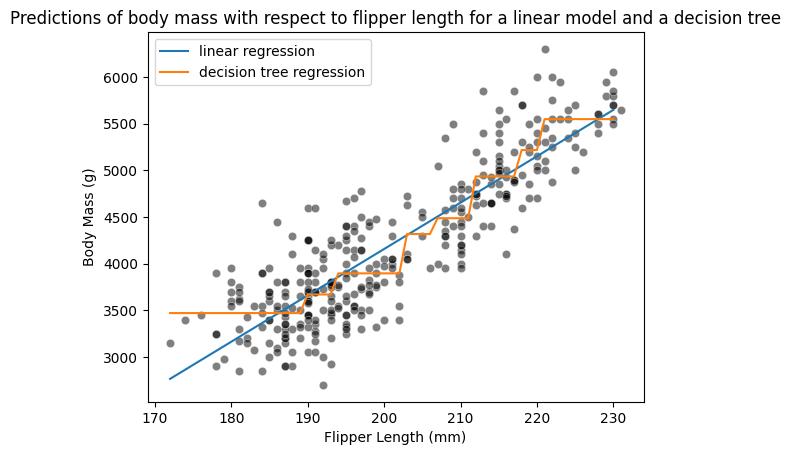

In [16]:
# Write your code here.
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data= penguins, x=data_train[feature_name], y=target_train, color = 'black', alpha = 0.5)
plt.plot(dataset[feature_name],linear_prediction, label='linear regression')
plt.plot(dataset[feature_name], tree_prediction, label='decision tree regression')
plt.legend()
_ = plt.title('Predictions of body mass with respect to flipper length for a linear model and a decision tree')

The prediction that we got were within the range of feature values seen during training. In some sens we observe the capabilities f our model to interpolate. 

Now, we check the extrapolation capabilities of each model. Create a dataset
containing a broader range of values than your previous dataset, in other
words, add values below and above the minimum and the maximum of the flipper
length seen during training.

In [22]:
# Write your code here.
offset = 50
dataset_offset = pd.DataFrame(
    np.arange(data_train[feature_name].min() - offset, 
              data_train[feature_name].max() + offset),
              columns=[feature_name]
)
dataset.head()

,Flipper Length (mm)
0,122.0
1,123.0
2,124.0
3,125.0
4,126.0


Finally, make predictions with both models on this new interval of data.
Repeat the plotting of the previous exercise.

In [23]:
# Write your code here.
linear_offset_prediction = linear_model.predict(dataset_offset)
tree_offset_prediction = tree.predict(dataset_offset)

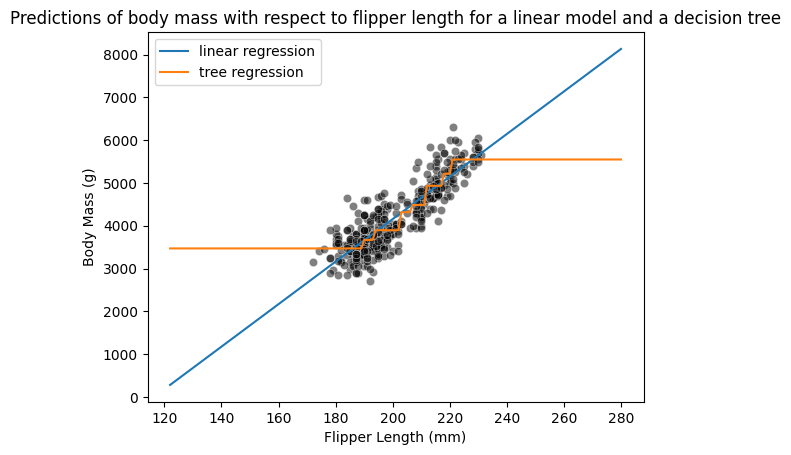

In [24]:
sns.scatterplot(data=penguins,
                x = data_train[feature_name],
                y = target_train,
                color="black",
                alpha=0.5)
plt.plot(dataset_offset[feature_name], linear_offset_prediction, label = "linear regression")
plt.plot(dataset_offset[feature_name], tree_offset_prediction, label = "tree regression")
plt.legend()
_ = plt.title("Predictions of body mass with respect to flipper length for a linear model and a decision tree")

The linear model extrapolates using the fitted model for flipper lengths < 175 mm and > 235mm. In fact, we are using the model parametrization to make these predictions. As mentionned, decision trees are non parametric models and we observe that they cannot extrapolate. For flipper lengths below the minimum, the mass of the penguin in the training data with the shortest flipper length will always be predicted. Simiarly for flipper lengths above the maximm, the mass of the pengiuns in the training data with the longest flipper will always be predicted